In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import mplfinance as mplf
import numpy as np
import pandas as pd

import bars
import c
import d
import microstructure
import u

In [3]:
plt.rcParams["figure.figsize"] = (20, 8)
data = d.fetch("data/future/daily", "ES.csv")
data["log_close"] = np.log(data["Close"])

period=pd.Timedelta(52, "W")
rolling_window="365D"

# High-Low Volatility Estimator

<AxesSubplot:xlabel='Date'>

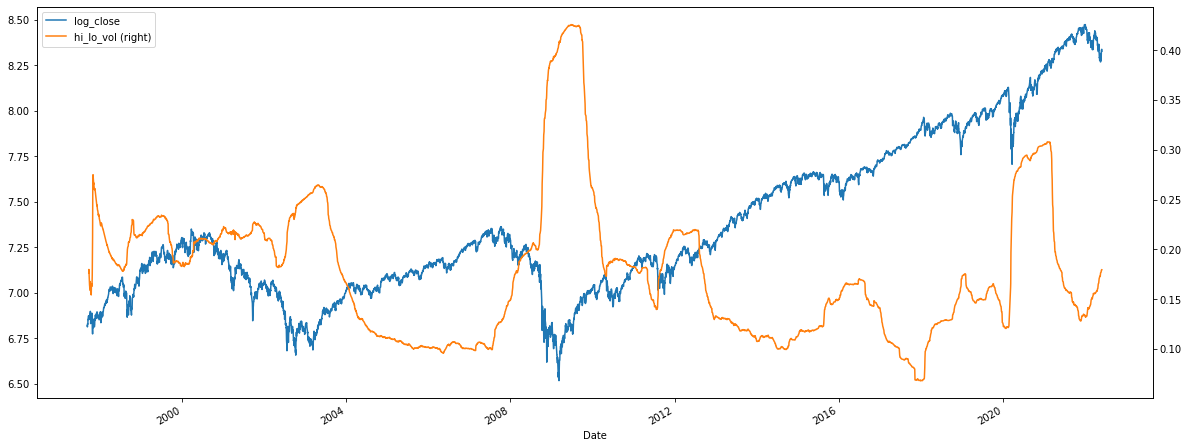

In [4]:
data["hi_lo_vol"] = microstructure.high_low_volatility_estimator(data, period=period, rolling_window=rolling_window)
data[["log_close", "hi_lo_vol"]].plot(secondary_y="hi_lo_vol")

# Close-Close Volatility Estimator

<AxesSubplot:xlabel='Date'>

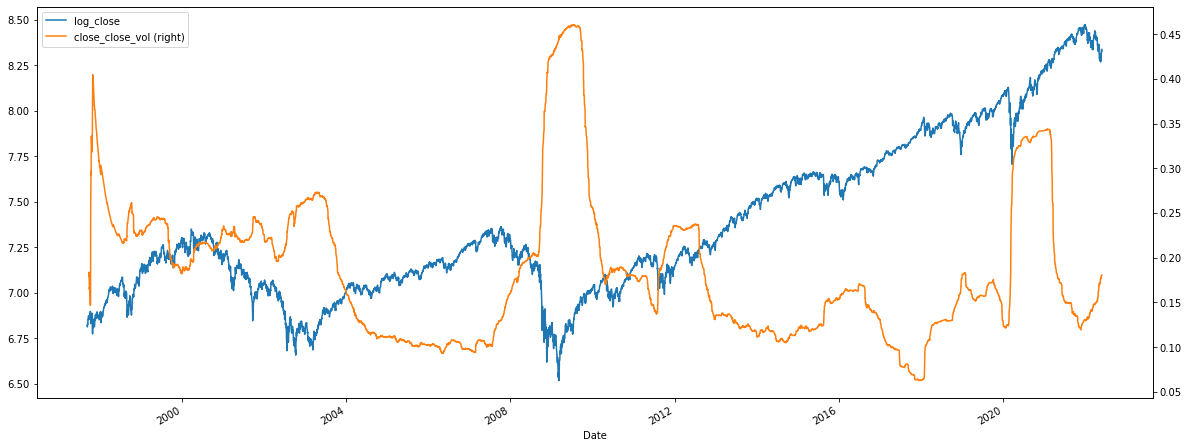

In [5]:
data["close_close_vol"] = microstructure.close_close_volatility_estimator(data, period=period, rolling_window=rolling_window)
data[["log_close", "close_close_vol"]].plot(secondary_y="close_close_vol")

# Comparison

<AxesSubplot:xlabel='Date'>

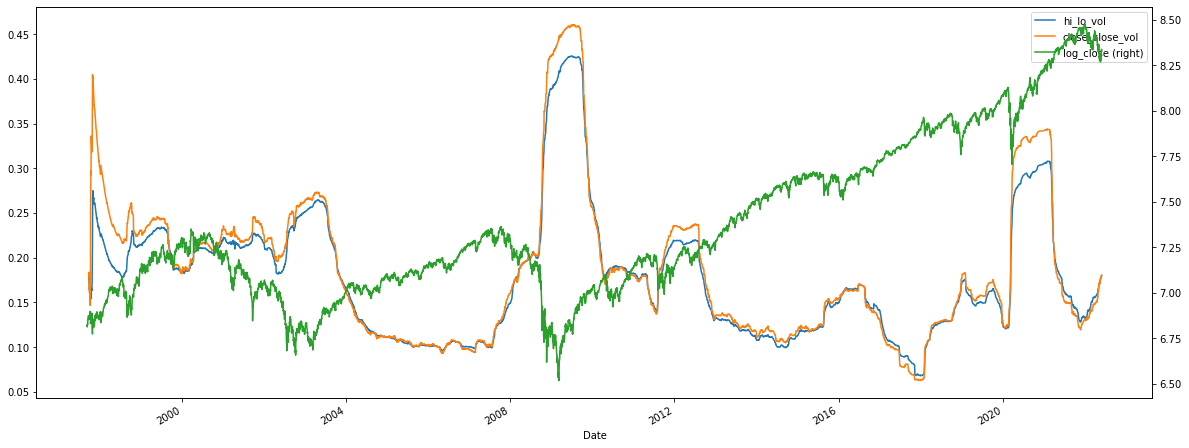

In [6]:
data[["hi_lo_vol", "close_close_vol", "log_close"]].plot(secondary_y="log_close")

Text(0, 0.5, 'Close Close Estimate')

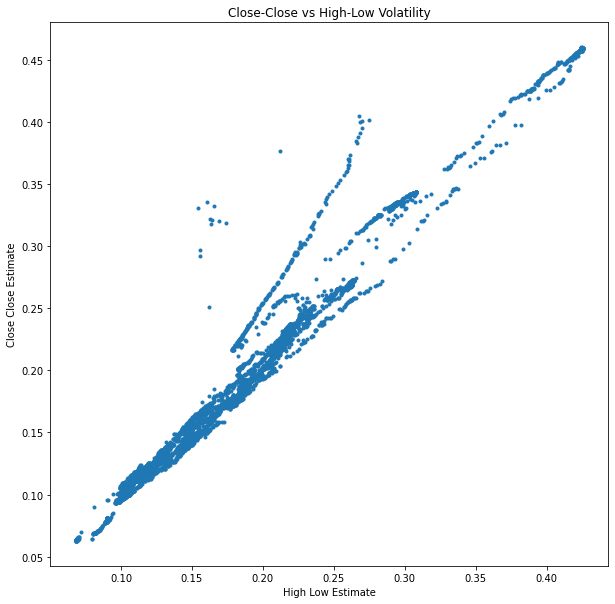

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(data["hi_lo_vol"], data["close_close_vol"], marker='.')
plt.title("Close-Close vs High-Low Volatility")
plt.xlabel("High Low Estimate")
plt.ylabel("Close Close Estimate")